# cracking model example

In [39]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2

import helper_func as hf
from cracking import Cracking_Model

In [40]:
# raw data
class Param: pass
raw_pars = Param()

# material properties
r0_bar_mean = 5e-3          # rebar diameter [m]
f_t_mean=5.                 # concrete ultimate tensile strength[MPa]
E_0_mean=32e3               # concrete modulus of elesticity [Mpa]

x_loss_mean = 12.5e-6*0.6   # rebar section loss, mean [m]
cover_mean = 4e-2           # cover thickness, mean [m]

raw_pars.r0_bar = Normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = Normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)  # or from the corrosion model solution
raw_pars.cover = Normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = Normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = Normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = Normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = Beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # rust volumetric expansion rate  2.96 lower 2.6  upper: 3.3



deterministic
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:256: RuntimeWarning: invalid value encountered in greater_equal
  sol = solve_stress_strain_crack_stochastic(self.pars)  # no plot
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:257: RuntimeWarning: invalid value encountered in less_equal
  else:
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:273: RuntimeWarning: invalid value encountered in less
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:70: RuntimeWarning: invalid value encountered in less_equal
  return sigma_theta
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:73: RuntimeWarning: invalid value encountered in greater
  def crack_width_open(a, b, u_st, f_t, E_0):
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:73: RuntimeWarning: invalid value encountered in less_equal
  def c

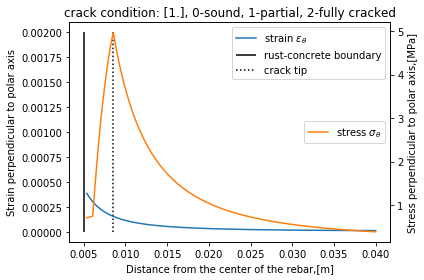

In [41]:
# initialize model
model_crack = Cracking_Model(raw_pars)
# run model in deterministic mode to check the stress and strain diagram 
model_crack.run(stochastic=False)

In [42]:
# run model in stochastic mode
model_crack.run(stochastic=True)
model_crack.postproc()

print(model_crack.crack_visible_rate_count)
print(model_crack.R_c - model_crack.pars.r0_bar) #/ M.pars.cover
print(model_crack.pars.cover)

/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:166: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:168: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:256: RuntimeWarning: invalid value encountered in greater_equal
  sol = solve_stress_strain_crack_stochastic(self.pars)  # no plot
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:257: RuntimeWarning: invalid value encountered in less_equal
  else:
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:267: RuntimeWarning: divide by zero encountered in true_divide
  crack_length_over_cover[np.isnan(crack_length_over_cover)] = 0.0  # crack length=0 for no crack
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:273: RuntimeWarning: invali

(array([29667.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 70333.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

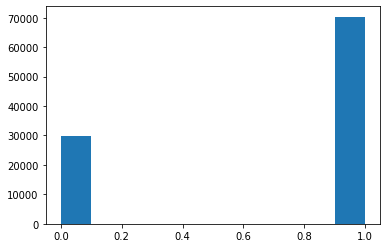

In [43]:
plt.figure()
hf.Hist_custom(model_crack.crack_condition)

Text(0.5, 0, 'crack length/ cover')

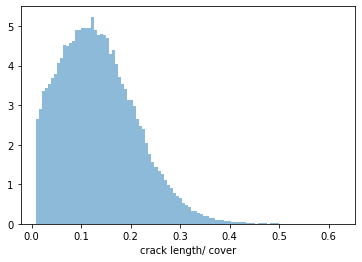

In [52]:
# histgram of the relative crack length though the cover
hf.Hist_custom(model_crack.crack_length_over_cover[model_crack.crack_length_over_cover != 0]) # eliminate the uncracked case
plt.xlabel('crack length/ cover')